In [33]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options




In [34]:

class flipkart_fashion:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.flipkart.com/search?q={self.items}'   
        self.pageurl2=f'https://www.flipkart.com/search?q={self.items}&page='
    cardClass = '_1xHGtK'
    nameCard='_2WkVRV'
    descriptionClass='IRpwTa'
    priceClass="_30jeq3"
    imageClass='_2r_T1I'
    hrefClass='IRpwTa'
    
class amazon:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2'
        self.pageurl2=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2&page='
    cardClass='s-search-result'
    nameCard='a-size-base-plus a-color-base'
    descriptionClass='a-size-base-plus a-color-base a-text-normal'
    priceClass='a-price-whole'
    imageClass='s-image'
    hrefClass='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'
class myntra:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.myntra.com/{self.items}'
        self.pageurl2=f'https://www.myntra.com/{self.items}?p='
    cardClass='product-base'
    nameCard='product-brand'
    descriptionClass='product-product'
    priceClass='product-discountedPrice'
    imageClass='img-responsive'
    hrefClass='_blank'
    

In [35]:
itemName= 'pants'
itemName='%20'.join(itemName.strip().split())


In [36]:
keyWords=[]
itemList=[]

In [37]:
websites = [flipkart_fashion(itemName),amazon(itemName),myntra(itemName)]
namewebsites=['flipkart','amazon','myntra']


itemName ='%20'.join(input().split())


In [38]:

def setlist(item,nameCard,descriptionClass,priceClass,websitewhich,imageClass,hrefClass):
    if str(websitewhich)=='flipkart':
        name=item.find('div',class_=nameCard).text
        dis=item.find('a',class_=descriptionClass)['title']
        price=item.find('div',class_=priceClass).text[1:]
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']

        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.flipkart.com'+str(href)]
    elif str(websitewhich)=='amazon':
        name=item.find('span',class_=nameCard).text
        dis=item.find('span',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price='0'
        else:
            price=price.text
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']
        
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.amazon.com'+str(href)]
    elif str(websitewhich)=='myntra':
        name=item.find('h3',class_=nameCard).text
        dis=item.find('h4',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price=item.find('div',class_='product-price')
            if price==None:
                price='0'
            else:
                price=price.text[3:]
        else:
            price=price.text[3:]
        if item.find('img',class_=imageClass)==None:
            img='not available'
        else:
            img=item.find('img',class_=imageClass)['src']
        href=item.find('a')['href']
        # if len(price)>3:
        #     price=price[3:]
        # if price==None:
        #     price=0
        print(price)
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.myntra.com/'+str(href)]
        

In [39]:
WINDOW_SIZE = "1920,1080"
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)

In [40]:
for no,i in enumerate(websites):
    cardClass=i.cardClass
    nameCard=i.nameCard
    descriptionClass=i.descriptionClass
    priceClass=i.priceClass
    imageClass=i.imageClass
    pageurl=i.pageurl
    pageurl2=i.pageurl2
    hrefClass=i.hrefClass
    # itemPage=requests.get(pageurl,headers={'User-Agent': 'Mozilla/5.0'}).content
    for enum in range(1,6):
        
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(pageurl2+str(enum))
        itemPage=driver.page_source
        idk = BeautifulSoup(itemPage,'html.parser')
        # driver.close()
        if namewebsites[no]=='flipkart':
            itemCards=idk.find_all('div',class_=cardClass)[1:]
        elif namewebsites[no]=='amazon':
            itemCards=idk.find_all('div',{'data-component-type': 's-search-result'})
        elif namewebsites[no]=='myntra':
            itemCards=idk.find_all('li',class_=cardClass)
    

        itemList.extend([setlist(item,nameCard,descriptionClass,priceClass,namewebsites[no],imageClass,hrefClass) for item in itemCards])

In [41]:
file=open('temp.txt','w')

In [42]:

print(itemList)
table=pd.DataFrame(itemList)
table=table.sort_values(by=2)
table.to_excel('data.xlsx')


[['KOTTY', 'Women Flared Black Viscose Rayon Trousers', 381.0, 'https://rukminim1.flixcart.com/image/612/612/xif0q/trouser/v/d/k/30-kttwomenspant322-kotty-original-imagmycpcqmujegh.jpeg?q=70', 'https://www.flipkart.com/kotty-flared-women-black-trousers/p/itm379d049e529db?pid=TROGMYCRJJFBJGFZ&lid=LSTTROGMYCRJJFBJGFZTYR2JT&marketplace=FLIPKART&q=pants&store=clo%2Fvua&srno=s_1_2&otracker=search&iid=en_jzvqU%2B%2ByBsKgTOq2WKOrbAlkfmt0hqduMXc0ekI%2B50T1jBW%2Fcs8%2F962kfSsLOXziKcy1ySTxL8AKOj7hcTvmxA%3D%3D&ssid=46y69jwwyo0000001681018286364&qH=ca425b88f047ce8e'], ['Roadster', 'Men Slim Fit Beige Cotton Blend Trousers', 779.0, 'https://rukminim1.flixcart.com/image/612/612/jpu324w0/trouser/c/5/j/30-2290963-roadster-original-imafbz6y5gmshsrr.jpeg?q=70', 'https://www.flipkart.com/roadster-slim-fit-men-beige-trousers/p/itmfbz6gjbn8dcba?pid=TROFBXAJDH8AKZG9&lid=LSTTROFBXAJDH8AKZG9HCTJMK&marketplace=FLIPKART&q=pants&store=clo%2Fvua&srno=s_1_3&otracker=search&iid=9648aa3d-6953-4964-aea2-9aecfaeb5d71.

# here we have multiple rows with same name , lets remove it

In [43]:
unique_values = table.iloc[:,0].unique()
print(unique_values)
uniquevaluedict={}
for i in range(len(table)):
    if table.iloc[i,0] in uniquevaluedict:
        uniquevaluedict[table.iloc[i,0]]+=1
        table.iloc[i,0]=str(table.iloc[i,0])+str(uniquevaluedict[table.iloc[i,0]])
    else:
        uniquevaluedict[table.iloc[i,0]]=1


['Generic' 'KAFF' 'THEFATILOOK' 'POPWINGS' 'LEE TEX' 'Kidbee' 'Me Craft'
 'GRECIILOOKS' 'LINOGES' 'Univerz' 'T2F' 'Leriya Fashion' 'GT SPORTS'
 'KOTTY' 'VIMAL JONNEY' 'Foxter' 'AVOLT' 'GYRFALCON' 'DHRUVI TRENDZ'
 'MOONVELLY' 'ADDYVERO' 'BLINKIN' 'SHAUN' 'JUGULAR' 'FUBAR' 'Prelax'
 'CYPHUS' 'Q-Rious' 'The Modern Soul' 'Shasmi' 'Lyra' 'TOPLOT' 'PROXIMA'
 'ENDEAVOUR WEAR' 'ELANHOOD' 'Kuchipoo' 'JPM brothers'
 'Amazon Brand - Symbol' 'Kraasa' 'Amazon Brand - Tavasya' 'Cazibe'
 'Chromozome' 'BULLMER' 'TMG SURYA' 'STYLE ACCORD' 'Aahwan'
 'BLUE STAR SHARK' 'DBURKE' 'AD & AV' 'Brand Attitude' 'D-passion' 'Duke'
 'BAWLI BOOCH' 'Majestic Man' 'Peppyzone' 'METRONAUT By Flipkart' 'EIO'
 'Lux Lyra' 'Amazon Brand - Symactive' 'Tokyo Talkies' 'EVIGHT LIVING'
 'Whitewhale' 'Urbano Fashion' 'Aatman' 'MANCREW' 'Jinxer'
 'Alan Jones Clothing' 'SASSAFRAS' 'Peter England' 'TRASA' 'LONGBOTTOM'
 'SUMPTUOUS' 'HINGE' 'STOP' 'ADILEE' 'MARK LOUIIS' 'BEN MARTIN' 'Max'
 'Macroman M-Series' 'FITINC' 'aatman' 'FEEL 

Hey its time for visualizations


(-0.5, 1499.5, 1499.5, -0.5)

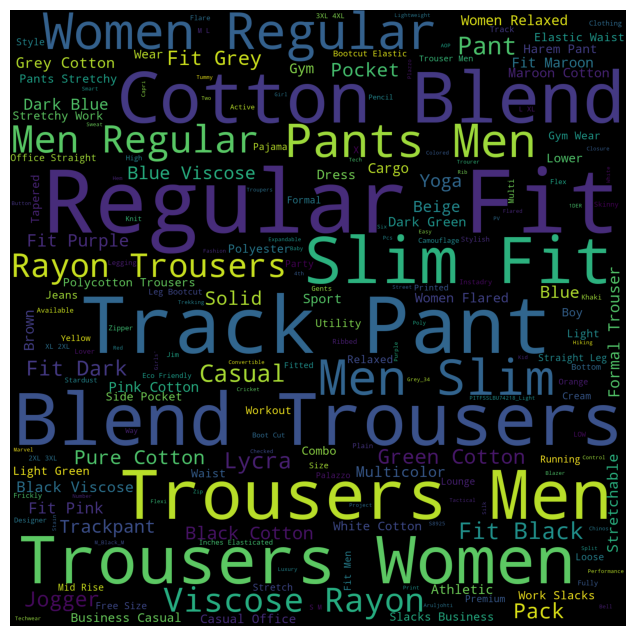

In [44]:
wordcloud = WordCloud(width = 1500, height = 1500).generate(' '.join(keyWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")



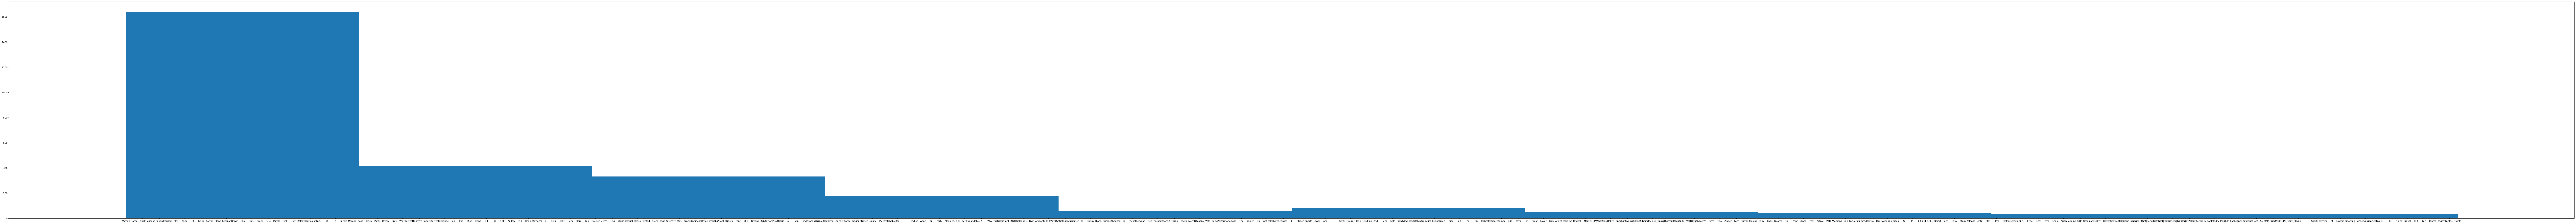

In [45]:
fig, ax = plt.subplots(figsize=(200, 17))
ax.hist(keyWords)

plt.show()


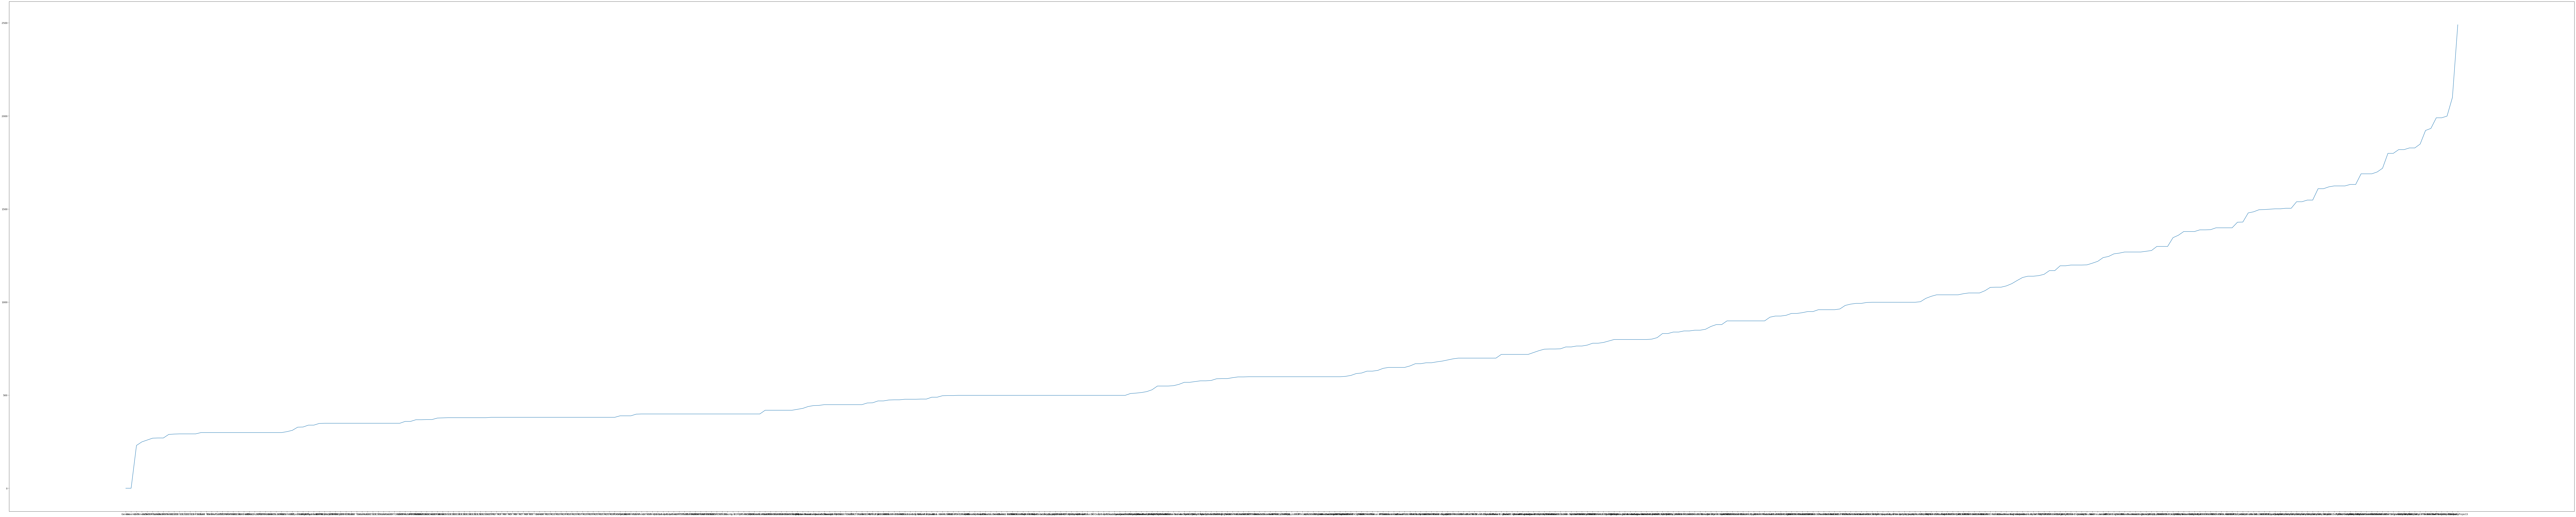

In [46]:
fig, ax = plt.subplots(figsize=(200, 40))
plt.plot(list(table.iloc[:,0]),list(table.iloc[:,2]))



In [47]:
print(set(keyWords))

{'Lowers', "Men's", 'Control,', 'Blend', 'and', 'S,', '6', 'Convertible', 'Mens', 'Stat', 'Hem', 'Frickly', 'Cream', 'Lounge', 'Pant', 'Poly', '(SMP034)', 'Business', 'Number', 'Pockets', '|Sports', 'Grey_34)', 'Women', 'Solid', 'Luxury', 'Lyra', 'Viscose', 'Size)', 'Yoga,Jogging,Gym', 'Sweatpants', 'XL,', 'Trackpant', 'Smart', '2XL,3XL,4XL', 'Baggy', 'Rayon', '(XS,', 'Zip', 'Party', '36', 'Jim', 'Relaxed', 'Fully', 'Style', 'Soft', 'Designer', 'Lover', 'Anti', 'Pocket', 'Utility', 'Slim', 'Sports', 'Womens', '34L)', 'Inches', 'wear', 'Trousers/Pant', 'Tactical', 'Workout', 'Button', 'Wear', 'Street', 'Baby', 'Pajama', 'Release,', 'Checked', 'Gyming,', 'Camouflage', 'Six', 'All', 'Sports,', 'Crotch', 'Yellow', 'Stain', 'Multi-Pockets', 'Elastic', 'Pant/Sweat', '|Palazzo', 'Dark', 'Lycra', 'to', '|Birthday', 'Loose', 'Palazzo', 'Flare', 'Casual', '(Track-Pant-5070)', 'Straight', 'Leg/Boot-Cut', 'Jogger', 'Pcs)', '|', 'Elasticated', 'Men', 'Gym', '(Pack', 'Capri', 'Party|Palazzo', 'Low',